<a href="https://colab.research.google.com/github/NIKHILNIGUDKAR/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Netflix Movies and TV Shows Clustering





##### **Project Type**    - Unsupervised
##### **Contribution**    - individual
##### **Team Member 1 -** - Nikhil Nagesh Nigudkar

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

innitially we start with understanding the data set, then we clean the data to make analysis ready.

explore the data and understand the behaviour of the same.

we then prepare the data for creating clusters by various parameters wherein we remove stop words, white spaces numbers etc so that we can get important words and based on that we shall form clusters.

later I have used the silhoute method and kmeans elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top 5 movies.

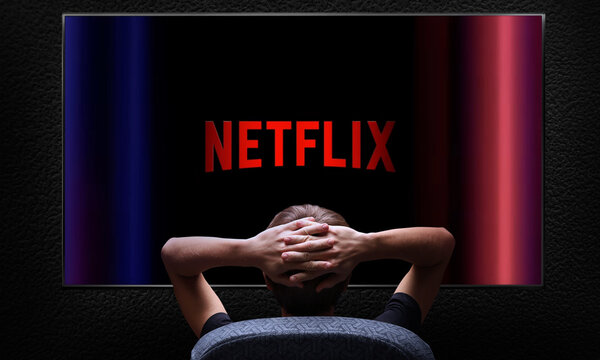

# **GitHub Link -**

https://github.com/NIKHILNIGUDKAR/Netflix_Movies_and_TV_Shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *


import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# reading data file
dir_path = '/content/drive/MyDrive/Classroom/'
file_name = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

**In the given dataset we have 7787 numbers of rows and 12 columns**

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate = df.duplicated().sum()
print(duplicate)

**There are no duplicate records in the dataset.**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)
print('-'*30)
print('Missing values in percentage')
print('-'*30)
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

In [ ]:
# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df,color = 'Red')
# msno.heatmap(df, cmap=my_palette)
plt.title('Visualizing the missing values')

### What did you know about your dataset?

1. show_id: Unique Id number for all the listed rows

2. type: denotes type of show namely TV Show or Movie

3. title: title of the movie

4. director: Name of director/directors

5. cast: lists the cast of the movie

6. country: country of the production house

7. date_added: the date the show was added

8. release_year: year of the release of the show

9. rating: show ratings

10. duration: duration of the show

11. listed_in: the genre of the show

12. description: summary/ description of the movie


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns= df.columns
print(columns)

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

*show_id:*  Unique Id number for all the listed rows

*type:* denotes type of show namely TV Show or Movie

*title:* title of the movie

*director:* Name of director/directors

*cast:* lists the cast of the movie

*country:* country of the production house

*date_added:* the date the show was added

*release_year:* year of the release of the show

*rating:* show ratings

*duration:* duration of the show

*listed_in:* the genre of the show

*description:* summary/ description of the movie

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  res = len(df[column].unique())
  print(f'The number of unique variables in {column} column are: {res}')
  if res<=15:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )
    print('--'*45)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# filling cast value as not available
df['cast'] = df['cast'].fillna(value='Not available')

# filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
df['country'] = df['country'].fillna(value='Not Known')
# df['country'] = df['country'].fillna(value=df['country'].mode())

# since date_added and rating have low % share that is 0.13 and 0.09 we are dropping the same
df = df.dropna(subset=['date_added','rating'])
# since too many missing values in director column, we are dropping the same
df = df.drop(['director'],axis=1)

In [ ]:
df.isna().sum()

### What all manipulations have you done and insights you found?

To make the data analysis ready we have done the following:

* Filled missing values of cast with Not available.
* Filled missing values of cast with Not Known.
* Dropped rows of date_added missing values.
* Dropped rows of ratings missing values.
* Dropped the entire column of director as it had 30% of the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Pie Chart-Movies vs TV shows**

In [ ]:
# Chart - 1 visualization code
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

To check what is percentage of Tv shows and Movies and used Pie chart because pie chart are easy to understand .

##### 2. What is/are the insight(s) found from the chart?

From this chart we get to know that 69.14% data is of movies while 30.86% are of TV shows.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show us that most of the data is of movies


#### Chart - 2

**Count Plot of Ratings**

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(20, 5))
sns.countplot(x='rating', data=df)

# setting chart title
plt.title('Counts of various ratings')
plt.xticks(rotation = 90)

# display chart
plt.show()

# printing the counts for reference
print(df.rating.value_counts())

##### 1. Why did you pick the specific chart?

Count Plots gives  well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is found that most of the ratings are given by TV-MA(2863) followed by TV-14(1931) the least ratings are by NC-17(3).while other are in the middle range.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Gained insites are good to understand the ratings system on the dataframe.

#### Chart - 3

**Counts of movies with respect to various years**

In [ ]:
# Chart - 3 visualization code
# creating temp dataframe
temp_data_df = df.groupby(['release_year'])['show_id'].count()
plt.rcParams['figure.figsize'] = (20, 5)

# plotting the temp df
temp_data_df.plot.line()
# setting chart title
plt.title('Counts of movies with respect to various years')
plt.ylabel('Count')
plt.xlabel('Release Year')
# display chart
plt.show()

# deleting the temporary dataframe for optimization of memory
del temp_data_df

##### 1. Why did you pick the specific chart?

A line chart is better to understand the treands with respect to time

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the movies on netflix are of the reliese date from 2010 to 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps us to understand that most of the movies released are new or old, its found that most are from recently released.

#### Chart - 4

**Top 10 countries with maximum movies**

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20, 5))
df['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
# sns.countplot(x='country', data=df)

# setting chart title
plt.title('Counts of production country')
# plt.xticks(rotation = 90)
plt.ylabel('year')
plt.xlabel('count')
# display chart
plt.show()

# printing the counts for reference
print(df.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Horizontal bar is good to visualize the data and interpret the data

##### 2. What is/are the insight(s) found from the chart?

The content belongs to United states alone is 2546, followed by India



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us understand that most of the data we have belongs to United states followed by India

#### Chart - 5

In [ ]:
# seperating and creating 2 dataframe based on type
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']

In [ ]:
# Chart - 5 visualization code

movie_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
movie_ratings = movie_ratings.sort_values('count', ascending=False).reset_index()
# top10_movies = movies_df['listed_in'].value_counts().reset_index(name='count').head(10)
# print(top10_movies)
sns.barplot(x='rating',y='count',data=movie_ratings)

# setting chart title
plt.title('Counts of movies with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(movie_ratings)
# deleting the movie_ratings dataframe for optimization of memory
del movie_ratings

##### 1. Why did you pick the specific chart?

Bar plot is good to visualize and understand the data in this case.



##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA has more ratings that is 1845 followed by TV-14 1272 and NC-17 are least with 3 and UR with 5

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of ratings for movies


#### Chart - 6

**Counts of TV Shows with respect to various type of ratings**

In [ ]:
# Chart - 6 visualization code

# Chart - 6 visualization code
tv_shows_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
tv_shows_ratings = tv_shows_ratings.sort_values('count', ascending=False).reset_index()

sns.pointplot(x='rating',y='count',data=tv_shows_ratings)
sns.boxplot(x='rating',y='count',data=tv_shows_ratings)

# setting chart title
plt.title('Counts of TV Shows with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()
# print(tv_shows_ratings)

# deleting the movie_ratings dataframe for optimization of memory
del tv_shows_ratings

##### 1. Why did you pick the specific chart?

A scatter plot is best to undersatnd how the data is scattered in the given trends

##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA rating is max that is 1016 for the TV Shows followed by 656 for TV-14 the least ratings are by TV-Y7-FV that is 1 and R is 2

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of ratings for TV shows

#### Chart - 7

**Top 10 TV Shows Genre**

In [ ]:
# Chart - 7 visualization code
#getting counts of different TV shows in listed in
top10_TV_Shows = tv_shows_df['listed_in'].value_counts()
# sorting based on counts
top10_TV_Shows = top10_TV_Shows.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_TV_Shows = top10_TV_Shows.tail(10)

# plotting
top10_TV_Shows.plot(kind='barh')
# setting chart title
plt.title('Top 10 TV Shows Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

# print(top10_TV_Shows)
# deleting the movie_ratings dataframe for optimization of memory
del top10_TV_Shows

##### 1. Why did you pick the specific chart?

barh is good to visualize the given scenario

##### 2. What is/are the insight(s) found from the chart?

Kids' TV has max count as 204 followed by International TV Shows, TV Dramas with 111.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trends of TV shows Genre



#### Chart - 8

**Top 10 Movies Genre**



In [ ]:
# Chart - 8 visualization code
# getting counts of different movies in listed in
top10_movies = movies_df['listed_in'].value_counts()
# sorting based on counts
top10_movies = top10_movies.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_movies = top10_movies.tail(10)

# plotting
top10_movies.plot(kind='barh')
# setting chart title
plt.title('Top 10 Movies Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

print(top10_movies)
# deleting the movie_ratings dataframe for optimization of memory
del top10_movies

##### 1. Why did you pick the specific chart?

barh is good to visualize the given scenario


##### 2. What is/are the insight(s) found from the chart?

It is found that there are 334 documentaries and 321 Standup comedy

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart is just to understand the trendsof movies Genre



#### Chart - 9

In [ ]:
# Chart - 9 visualization code
sns.histplot(tv_shows_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for TV Show duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Hist plot shows histogram of the counts of various values



##### 2. What is/are the insight(s) found from the chart?

The provided dataframe is not suitable to claculate the time duration for TV shows



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The output CSV files must be improved



#### Chart - 10

In [ ]:
# Chart - 10 visualization code
sns.countplot(x='release_year',hue='type', data=df)

# setting chart title
plt.title('Various types of shows released with respect to year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')

# display chart
plt.show()


##### 1. Why did you pick the specific chart?

A seaborn count plot shows counts of TV Shows and Movies with respect to various years

##### 2. What is/are the insight(s) found from the chart?

The trends of TV shows increased over time

the moves relased after 2010 started to list on netflix trends increased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The trends of TV shows increased over time



#### Chart - 11

In [ ]:
# Chart - 11 visualization code
sns.histplot(movies_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')

# setting chart title
plt.title('Hist plot for movies duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Hist plot shows histogram of the counts of various values



##### 2. What is/are the insight(s) found from the chart?

Most of the movies range in 90-95 mins



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The plot is to understand what is avg time for movies



#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

The corelation chart shows the relation between the two specific feature



##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')
plt.figure(figsize=(25, 30))  # Adjust dimensions as needed

plt.show()

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.



##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the pair plot


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix

    * Null hypothesis H0: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.

    * Alternate hypothesis Ha: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter the movies DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only movies produced in India
us_movie_df = movies_df[movies_df.country == 'United States']
india_movie_df = movies_df[movies_df.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t, p = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p < alpha:
  # If the p-value is less than the significance level, reject the null hypothesis
  print("We reject the null hypothesis.")
else:
  # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
  print("We fail to reject the null hypothesis.")

# deleting the temporary dataframe we obtained to calculate the alpha value
del us_movie_df
del india_movie_df

##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movie data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

    * Null hypothesis H0: There is no significant difference in the number of movies and TV shows added by Netflix across different months.

    * Alternate hypothesis Ha: There is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Convert the date_added column of the DataFrame to a datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month name from the date_added column and create a new column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the type and month_added columns
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test on the contingency table
from scipy.stats import chi2_contingency
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Rounding to 2
chi2_statistic = round(chi2_statistic, 2)
p_value = round(p_value, 2)

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, I wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix.

##### Why did you choose the specific statistical test?

I choose the chi-square test for independence as I was interested in testing for a potential association between two categorical variables.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.

    * Null hypothesis H0: The number of movies and TV shows on Netflix is not significantly different.

    * Alternate hypothesis Ha: The number of movies on Netflix is significantly greater than the number of TV shows.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows in the DataFrame
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Print the number of movies and TV shows
# print('Number of movies:', n_movies)
# print('Number of TV shows:', n_tv_shows)

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Print the counts and sample sizes
print('After setting counts and sample sizes for the z-test:')
print('Counts:', counts)
print('Sample sizes:', nobs)

# Perform a z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results of the z-test
print('After performing the z-test assuming equal proportions:')
print('z-statistic:', z_stat)
print('p-value:', p_val)

# deleting the temporary dataframe we obtained
del n_movies
del n_tv_shows

##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have handled the missing values in data wrangling step

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

**most of the columns are categorical, no outliers observed**

##### What all outlier treatment techniques have you used and why did you use those techniques?

most of the columns are categorical, no outliers observed

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

**Most of the columns are categorical, no outliers observed**

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# Create a new column called 'tags' in the DataFrame 'df'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in', and 'cast' columns
df['tags'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [ ]:
# cross checking our result for the function created
print(df['tags'][0])

#### 2. Lower Casing

In [ ]:
# Lower Casing
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(to_lower)

# cross checking our result for the function created
print(df['tags'][0])


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuation from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)

    # Return the text with punctuation removed
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_punctuation)

# Print the first 'tags' value to cross-check that the function worked as expected
print(df['tags'][0])

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# our tags column doesnot have links so removing numbers
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)
# remove words and digits containing digits

# cross checking our result for the function created
print(df['tags'][0])

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Remove Stopwords
# since the language is english, we need to import english stop words
stop_words = stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# cross checking our result for the function created
print('Before')
print(df['tags'][0])
# applying the created function
df['tags'] = df['tags'].apply(remove_stop_words)
# cross checking our result for the function created
print('after')
print(df['tags'][0])

In [ ]:
# Remove White spaces
# remove white spaces in the 'tags'
df['tags'] = df['tags'].str.strip()
# cross checking our result for the function created

print(df['tags'][0])

#### 6. Rephrase Text

In [ ]:
# # Rephrase Text
#ot performing rephrasing of text
# Rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# df['tags'] = df['tags'].apply(rephrase_tags)

#### 7. Tokenization

Tokenization is not required.

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

df['tags'] = df['tags'].apply(stemming)


# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

##### Which text normalization technique have you used and why?

Word/Text vectorization is useful because most machine learning algorithms cannot work with raw text data directly. Instead, they require numerical inputs that can be processed mathematically. Word/Text vectorization solves this problem by transforming the text data into numerical vectors that can be understood by machine learning algorithms.

#### 9. Part of speech tagging

**Part of Speech Tagging is not required.**

In [ ]:
# POS Taging

#### 10. Text Vectorization

**Text Vectorization is not required.**

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

** Feature Manupulation is Not Required**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=32)
pca.fit(vector)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### silhouette Score(2-12)


In [ ]:
silhouette_avg = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(range(2,12), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

Does not support pikle file, the X and recommender df can be exported



### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Save the File
df_export = dir_path + 'recommender_df.csv'
X_export = dir_path + 'X.csv'
# Create a DataFrame from the transformed data
X_to_export = pd.DataFrame(X)

# Save the DataFrame to a CSV file
X_to_export.to_csv('X_export', index=False)
recommender_df.to_csv('df_export', index=False)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# the same dataframe can be loaded and recommeder can use the dataframe

# Load the transformed data from a CSV file
recom_df = pd.read_csv('df_export')
X_import = pd.read_csv('X_export')

# Convert the DataFrame to a NumPy array
X_imported = X_import.values


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our objective was to cluster shows based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 5 shows to users based on their viewing history.

We began our exploration with a dataset consisting of 7787 records and 11 attributes, with a focus on missing value imputation and exploratory data analysis (EDA). The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we selected six key attributes: director, cast, country, genre, rating, and description. These attributes were transformed into a 9000-feature TFIDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. We captured more than 80% of the variance by reducing the components to 2500.

Next, we used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method and Silhouette score analysis confirmed that the optimal number of clusters was 7 for K-Means. However, Agglomerative clustering suggested 5 clusters, which we visualized with a dendrogram.

We continued our efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity. This system offers personalized recommendations based on the type of show the user has watched and provides the user with 5 top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***